In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
df.info()
#EDA to view Columns, Data-types, Null values and number of entries
#No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.drop_duplicates()
df
#No duplicates found

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
#Checking for Null values in all columns
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
#Descriptive statistics to get mean, median(50% value) and std
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
#Modal Value for each column
df.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [11]:
#Ordering Data by Date so as to do Time series Analysis
df=df.sort_values(by ="Date")
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


TIME SERIES ANALYSIS

In [12]:
#Importing Matplotlib and Seaborn

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Converting Date to Date_Time format
df["Date"] = pd.to_datetime(df["Date"])

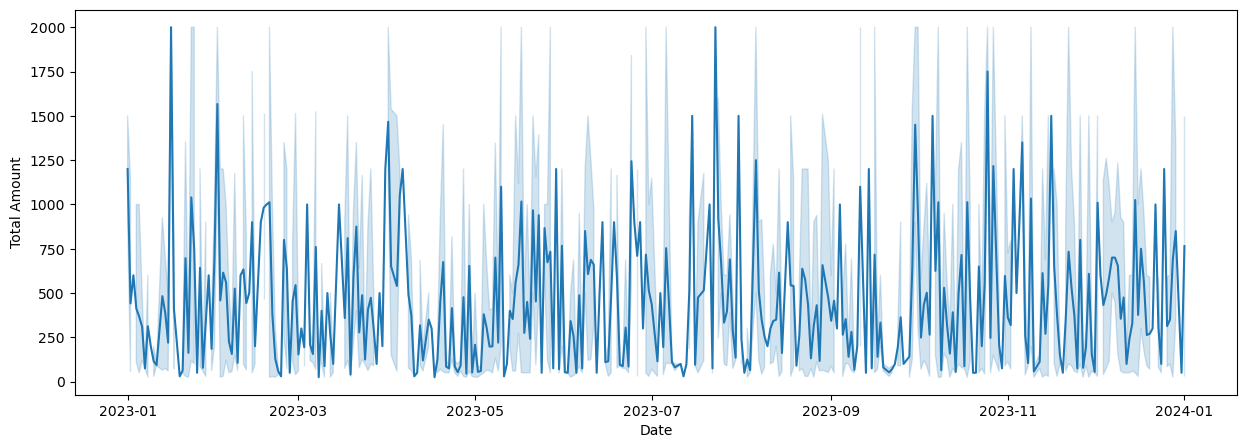

In [14]:
#Obtaining a plot of Total Amount of particular dates with Seaborn

plt.figure(figsize =(15,5))
sns.lineplot(x="Date", y="Total Amount", data=df)
plt.show()

Time series Analysis by Month

In [25]:
#Creating Month and Date Columns

df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

In [24]:
#Calculating Total Monthly_sales 

Monthly_sales = df.groupby(["Year", "Month"], as_index=False)["Total Amount"].sum()
df['Monthly_sales']= Monthly_sales['Total Amount']

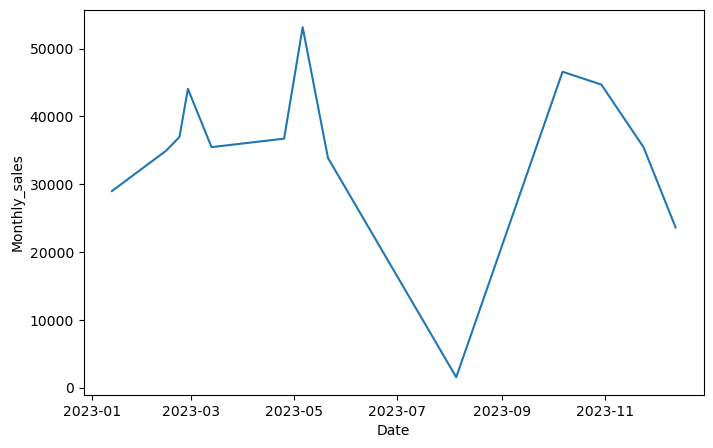

In [19]:
#A plot of Total_Monthly Sales Throughout the Year

plt.figure(figsize =(8,5))
sns.lineplot(x="Date", y="Monthly_sales", data=df)
plt.show()

In [26]:
#Deleting Month, Year and Monthly_sales columns for Customer and Product Analysis
df = df.drop(['Month', 'Year', 'Monthly_sales'], axis=1)
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
162,163,2023-01-02,CUST163,Female,64,Clothing,3,50,150
420,421,2023-01-02,CUST421,Female,37,Clothing,3,500,1500
609,610,2023-01-03,CUST610,Female,26,Beauty,2,300,600
682,683,2023-01-04,CUST683,Male,38,Beauty,2,500,1000
230,231,2023-01-04,CUST231,Female,23,Clothing,3,50,150


CUSTOMER AND PRODUCT ANALYSIS

In [27]:
#Creating Age brackets

age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50+']
df["Age group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right= True)

In [28]:
#Calculating Total Amount Spent by each Age_group 
Total_amount_by_age = df.groupby('Age group')['Total Amount'].sum()
print(Total_amount_by_age)

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


In [29]:
# Grouping by Age group and product category, and calculating the sum of spending

Grouped_data = df.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()


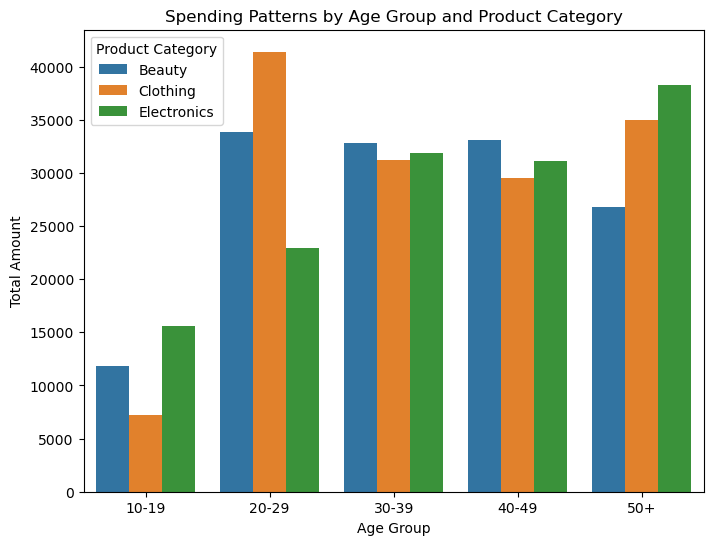

In [31]:
# Creating a bar plot to visualize spending patterns by age group and product category

plt.figure(figsize=(8, 6))
sns.barplot(x='Age group', y='Total Amount', hue='Product Category', data=Grouped_data)
plt.title('Spending Patterns by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()


GENDER SPENDING ANALYSIS

In [33]:
#Calculating Total amount spent by each Gender

Gender_Totalspend = df.groupby('Gender')['Total Amount'].sum().reset_index()
print(Gender_Totalspend)

   Gender  Total Amount
0  Female        232840
1    Male        223160


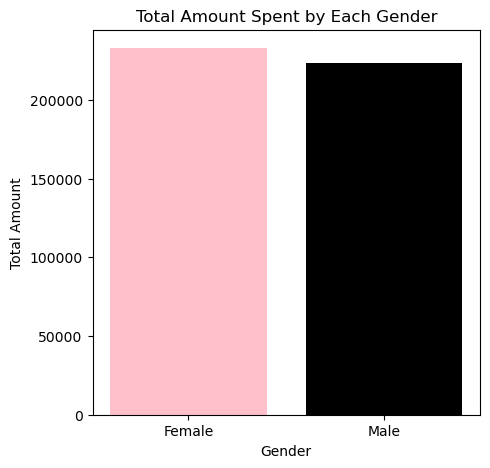

In [34]:
#Obtaining the Total spend plot for eacg Gender

plt.figure(figsize = (5,5))
plt.bar(Gender_Totalspend['Gender'], Gender_Totalspend['Total Amount'], color = ['pink', 'black'])
plt.title('Total Amount Spent by Each Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [36]:
#Product Preference by Gender

Gender_preference = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()

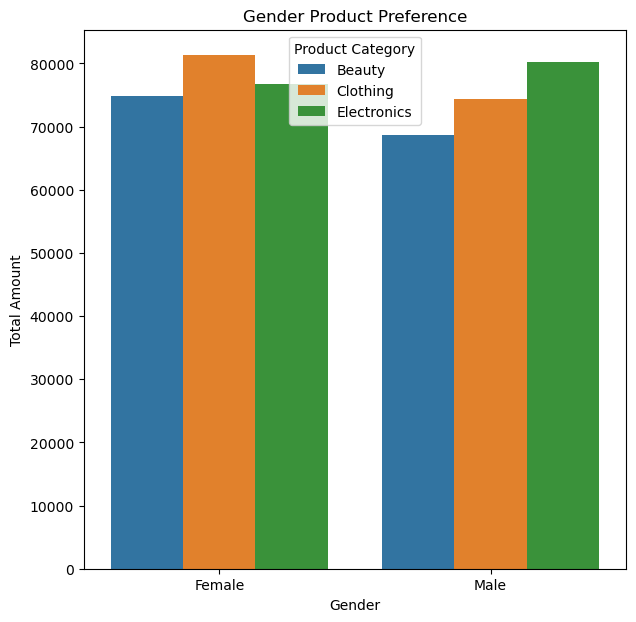

In [37]:
#A plot of Products showing preference by Total amount spent on each by each Gender

plt.figure(figsize= (7,7))
sns.barplot(x='Gender', y='Total Amount', hue='Product Category', data=Gender_preference)
plt.title('Gender Product Preference')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [38]:
#Total_Amount spent by the Average Male vs Female

Avg_amount_by_Gender = df.groupby('Gender')['Total Amount'].mean()
print(Avg_amount_by_Gender)

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


PRODUCT PERFORMANCE ANALYSIS



In [39]:
#Total revenue from Each Product Category
Total_revenue = df.groupby('Product Category')['Total Amount'].sum().reset_index()
print(Total_revenue)

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


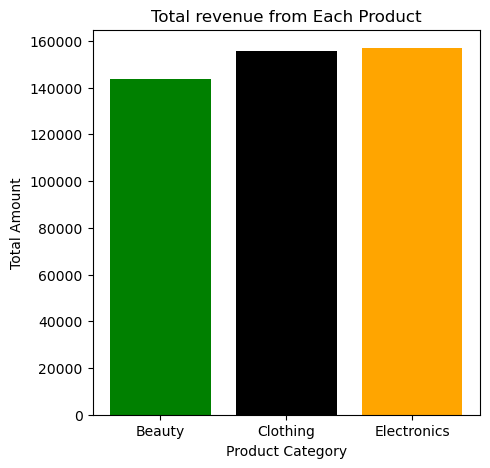

In [40]:
plt.figure(figsize = (5,5))
plt.bar(Total_revenue['Product Category'], Total_revenue['Total Amount'], color = ['green', 'black', 'orange'])
plt.title('Total revenue from Each Product')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

In [41]:
Total_num = df.groupby('Product Category')['Quantity'].sum().reset_index()
print(Total_num)

  Product Category  Quantity
0           Beauty       771
1         Clothing       894
2      Electronics       849


RECOMMENDATION
1. Create/Strengthen your online presence for age groups that show a higher inclination towards digital channels to improve sales.
2. Offer Age-group based discounts to incease client turn over for groups that are not performing well.
3. Create Product bundles, this pushes the sale of even products that are not getting alot of sales.
4. Engage with the community through events or partnerships that align with the interests of each age group.
5. Collect feedback from customers in each age/Gender group to understand their needs and expectations better.